In [1]:
#Import the relevant libraries for the exploratory data analysis (EDA)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# Viewing all files within the input directory for exploration

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/github-programming-languages-data/issues.csv
/kaggle/input/github-programming-languages-data/prs.csv
/kaggle/input/github-programming-languages-data/repos.csv


In [2]:
#Opening up and exploring the issues file with a pandas DataFrame

IssuesDf = pd.read_csv("/kaggle/input/github-programming-languages-data/issues.csv")

#Viewing the first 5 entries of the dataset and confirming the upload went as expected
IssuesDf.head()

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420


In [3]:
#Viewing the attributes of the DataFrame
IssuesDf.size #Size of IssuesDf

13500

In [4]:
IssuesDf.info #Information on the columns

<bound method DataFrame.info of             name  year  quarter  count
0           Ruby  2011        3    965
1     JavaScript  2011        3    694
2         Python  2011        3    619
3            PHP  2011        3    560
4           Java  2011        3    420
...          ...   ...      ...    ...
3370          Go  2022        1    204
3371         PHP  2022        1    173
3372  TypeScript  2022        1    169
3373           C  2022        1    151
3374          C#  2022        1    148

[3375 rows x 4 columns]>

Issues have been captured by number of issues per programming language every quarter from Q3 2011 - Q1 2022. On its own this can give us an idea of the robustness of certain langagues - I would expect less issues from enterprise production langagues and more from prototyping langauges with a large community.

Let's dive in and view all issues per language.

In [5]:
All_Issues = IssuesDf.groupby("name").sum("count")
Sorted_Issues = All_Issues.drop(["year", "quarter"], axis=1).sort_values("count", ascending=False)

Sorted_Issues.head(10)

,count
name,
JavaScript,6500226
Python,4192481
Java,3536070
PHP,2240585
C++,1941004
TypeScript,1741593
Go,1645358
C#,1407859
Ruby,1292627


Using JavaScript as a case study to view how issues have progressed over time

In [6]:
Javascript_Issues = IssuesDf[IssuesDf["name"] == "JavaScript"].groupby("year").sum("count")
Python_Issues = IssuesDf[IssuesDf["name"] == "Python"].groupby("year").sum("count")
Java_Issues = IssuesDf[IssuesDf["name"] == "Java"].groupby("year").sum("count")
PHP_Issues = IssuesDf[IssuesDf["name"] == "PHP"].groupby("year").sum("count")
Javascript_Issues.head()

,quarter,count
year,,
2011,7,4697
2012,10,102818
2013,10,287989
2014,10,596429
2015,10,1036613


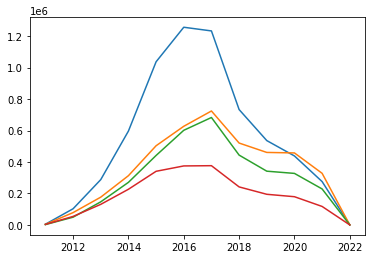

In [7]:
plt.plot(Javascript_Issues["count"])
plt.plot(Python_Issues["count"])
plt.plot(Java_Issues["count"])
plt.plot(PHP_Issues["count"])